In [16]:
## find best metric
import re
import os

# parse log
save_dir = "output/union/exp/ser_vi_layoutxlm_xfund_zh"
log_path = os.path.join(save_dir, "train.log")
save_figure_dir = os.path.join(save_dir, "figrue")
if not os.path.exists(save_figure_dir):
    os.makedirs(save_figure_dir)
with open(log_path, "r") as f:
    lines = f.readlines()

results = []
for line in lines:
    pattern = r"\[(?P<time>.*)\] ppocr INFO: best metric, hmean: (?P<hmean>.+), precision: (?P<precision>.+), recall: (?P<recall>.+), fps: (?P<fps>.+), best_epoch: (?P<best_epoch>.+)"
    match = re.match(pattern, line)
    if match:
        results.append(match.groupdict())
print("ser:")
print(results[-1])
print()

# parse log
save_dir = "output/union/exp/re_vi_layoutxlm_xfund_zh/"
log_path = os.path.join(save_dir, "train.log")
save_figure_dir = os.path.join(save_dir, "figrue")
if not os.path.exists(save_figure_dir):
    os.makedirs(save_figure_dir)
with open(log_path, "r") as f:
    lines = f.readlines()

results = []
for line in lines:
    pattern = r"\[(?P<time>.*)\] ppocr INFO: best metric, hmean: (?P<hmean>.+), precision: (?P<precision>.+), recall: (?P<recall>.+), fps: (?P<fps>.+), best_epoch: (?P<best_epoch>.+)"
    match = re.match(pattern, line)
    if match:
        results.append(match.groupdict())
print("re")
print(results[-1])

ser:
{'time': '2022/12/08 03:01:51', 'hmean': '0.9272213773625896', 'precision': '0.913527397260274', 'recall': '0.94133215703573', 'fps': '99.41815649652906', 'best_epoch': '183'}

re
{'time': '2022/12/08 08:10:35', 'hmean': '0.840175368672778', 'precision': '0.8120184899845917', 'recall': '0.870355078447564', 'fps': '2.8459509002975207', 'best_epoch': '105'}


## SER

In [1]:
import re
import os

# parse log
save_dir = "output/union/exp/ser_vi_layoutxlm_xfund_zh"
log_path = os.path.join(save_dir, "train.log")
save_figure_dir = os.path.join(save_dir, "figrue")
if not os.path.exists(save_figure_dir):
    os.makedirs(save_figure_dir)
with open(log_path, "r") as f:
    lines = f.readlines()

results = []
for line in lines:
    pattern = r"\[(?P<time>.*)\] ppocr INFO: epoch: \[(?P<epoch>\d+)/(?P<epoch_total>\d+)\], global_step: (?P<global_step>\d+), lr: (?P<lr>\d+\.\d+), loss: (?P<loss>\d+\.\d+), avg_reader_cost: (?P<avg_reader_cost>\d+\.\d+) s, avg_batch_cost: (?P<avg_batch_cost>\d+\.\d+) s, avg_samples: (?P<avg_samples>\d+\.\d+), ips: (?P<ips>\d+\.\d+) samples/s, eta: (?P<eta>.*)"
    match = re.match(pattern, line.strip())
    if match:
        results.append(match.groupdict())

import pandas as pd

df = pd.DataFrame(results)
df["time"] = df["time"].astype("datetime64")
df["epoch"] = df["epoch"].astype(int)
df["epoch_total"] = df["epoch_total"].astype(int)
df["global_step"] = df["global_step"].astype(int)
df["lr"] = df["lr"].astype(float)
df["loss"] = df["loss"].astype(float)
df["avg_reader_cost"] = df["avg_reader_cost"].astype(float)
df["avg_batch_cost"] = df["avg_batch_cost"].astype(float)
df["avg_samples"] = df["avg_samples"].astype(float)
df["ips"] = df["ips"].astype(float)
df.head()


,time,epoch,epoch_total,global_step,lr,loss,avg_reader_cost,avg_batch_cost,avg_samples,ips,eta
0,2022-12-08 02:29:25,1,200,10,0.000005,1.889397,0.25417,0.58961,8.0,13.56830,0:45:06
1,2022-12-08 02:29:27,1,200,20,0.000016,1.470491,0.00022,0.12725,8.0,62.86704,0:27:21
2,2022-12-08 02:29:28,1,200,23,0.000019,1.409033,0.00004,0.03299,1.8,54.56739,0:24:52
3,2022-12-08 02:29:32,2,200,30,0.000027,1.150795,0.26748,0.36092,5.6,15.51576,0:28:12
4,2022-12-08 02:29:35,2,200,40,0.000038,0.774737,0.11937,0.25524,8.0,31.34339,0:25:57


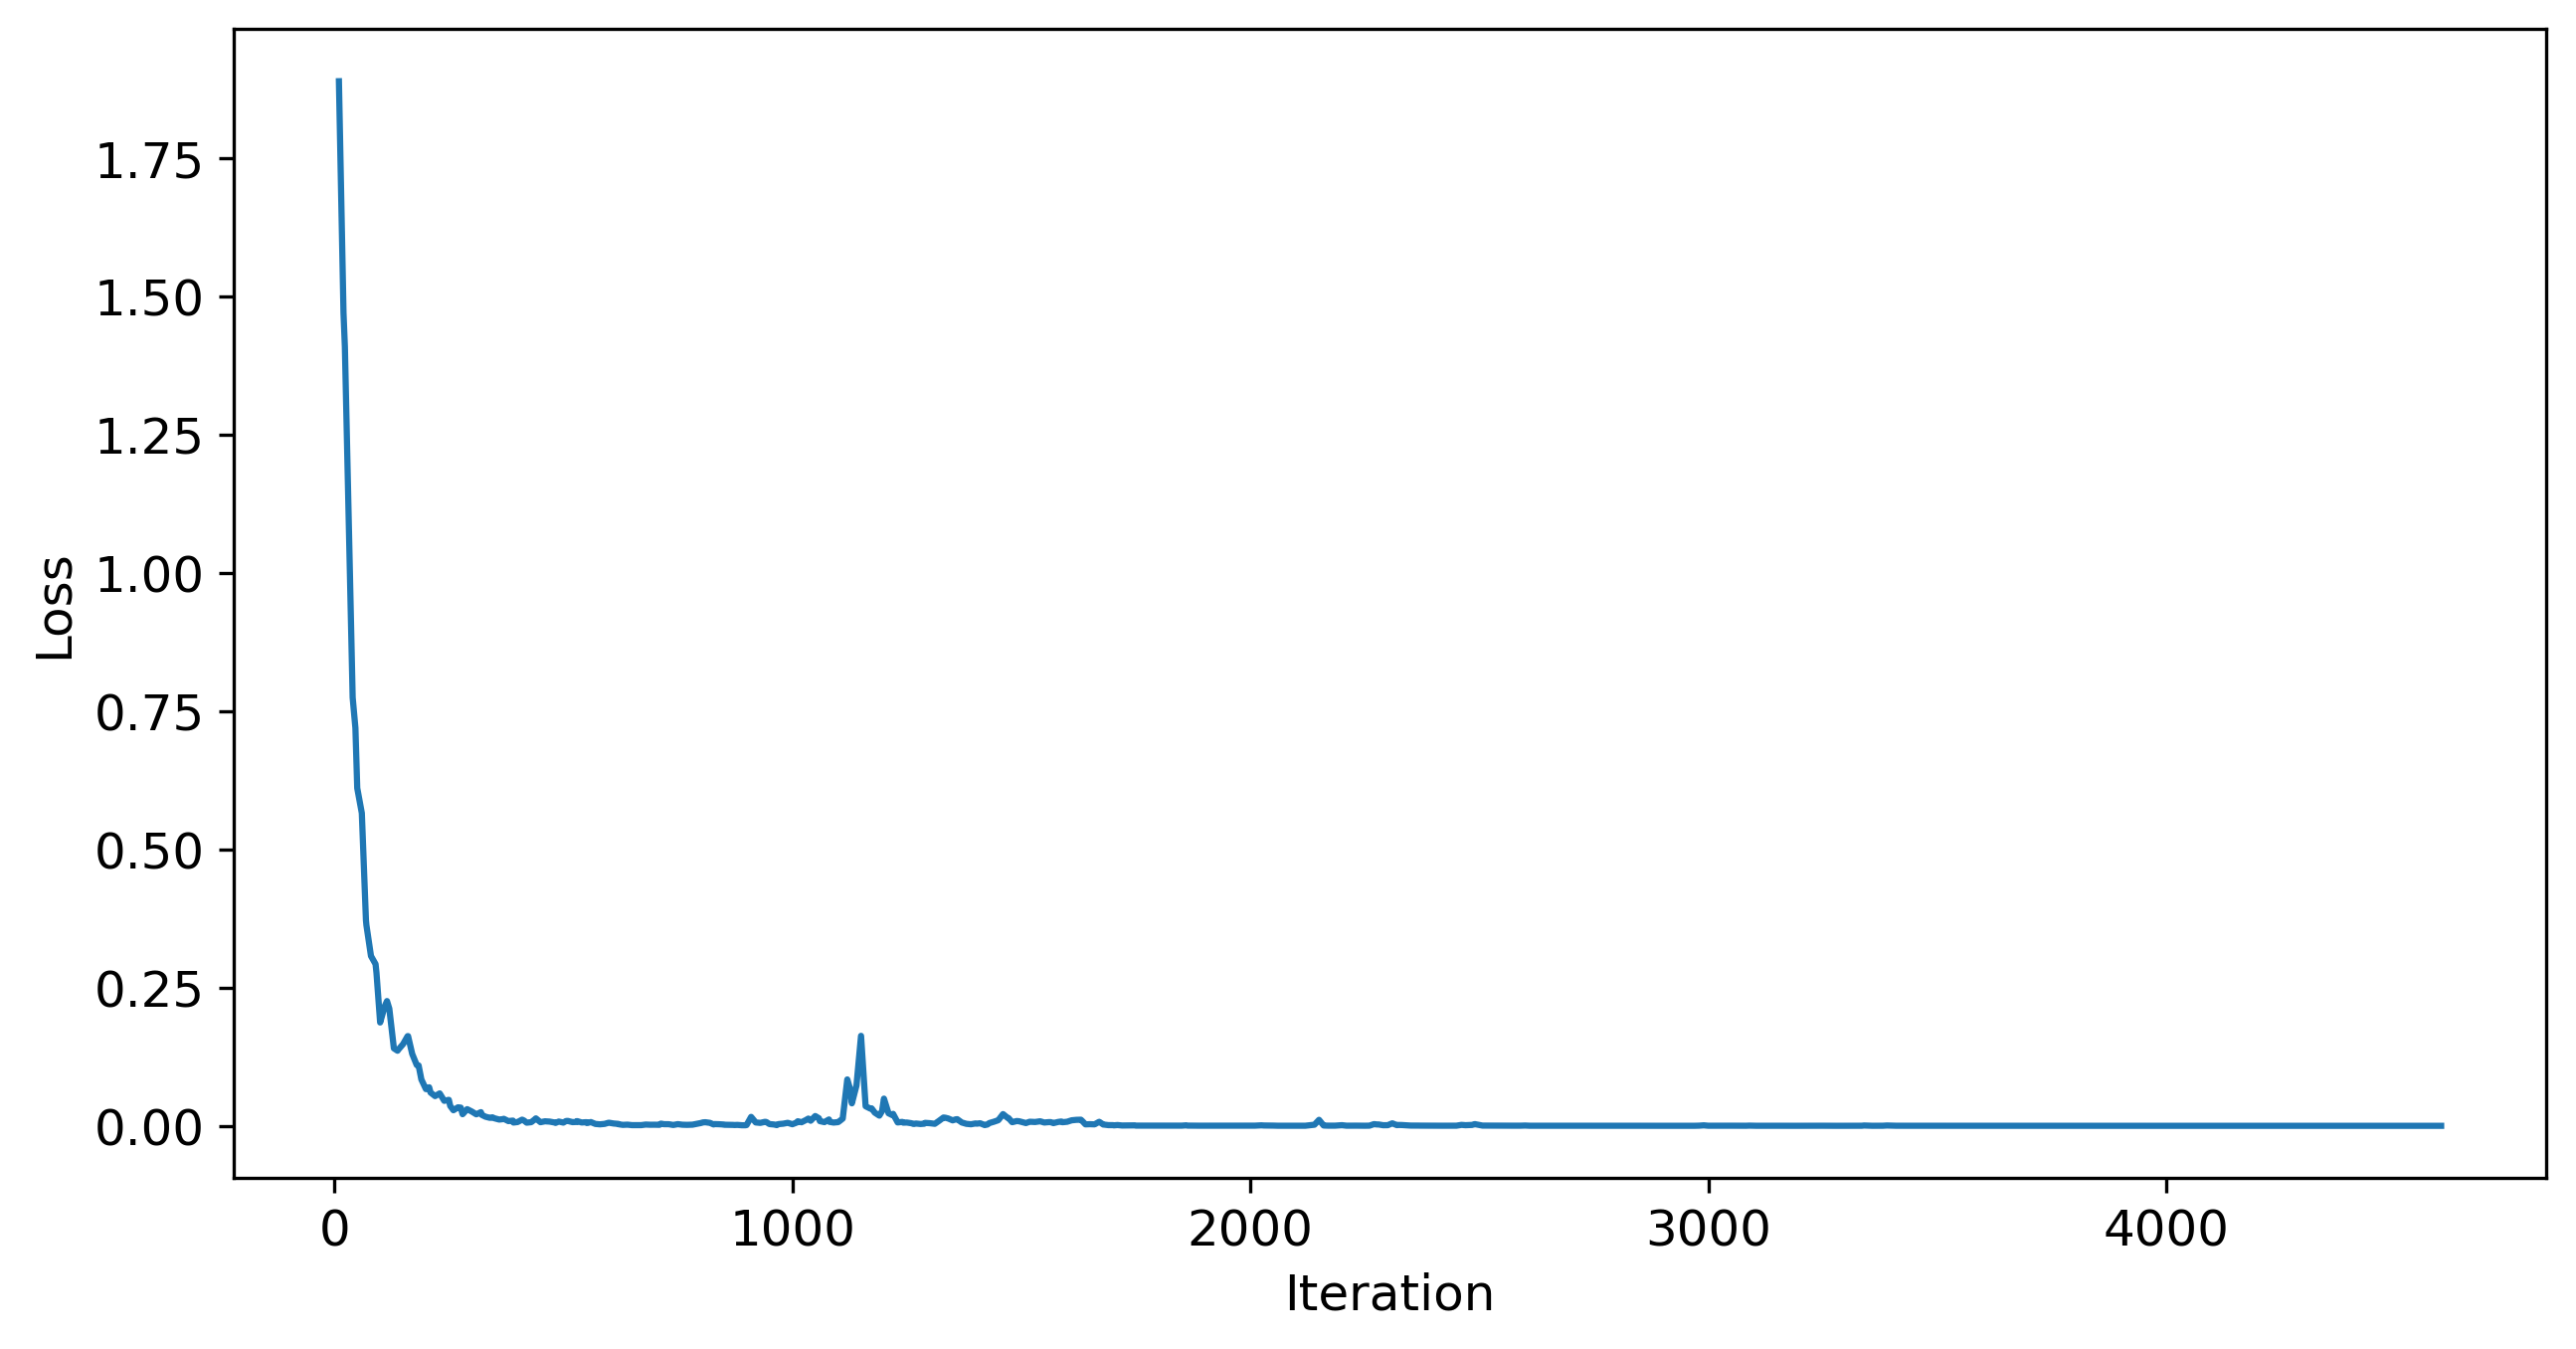

In [2]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
import matplotlib.pyplot as plt

# sns.set_style("white")
# sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# sns.set_palette("Set2")
# sns.lineplot(x="global_step", y="loss", data=df)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300

plt.figure(figsize=(10, 5))
plt.plot(df["global_step"], df["loss"], label="loss")
# plt.title("Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.savefig(os.path.join(save_figure_dir, "loss_train.png"), dpi=300)
# plt.show()


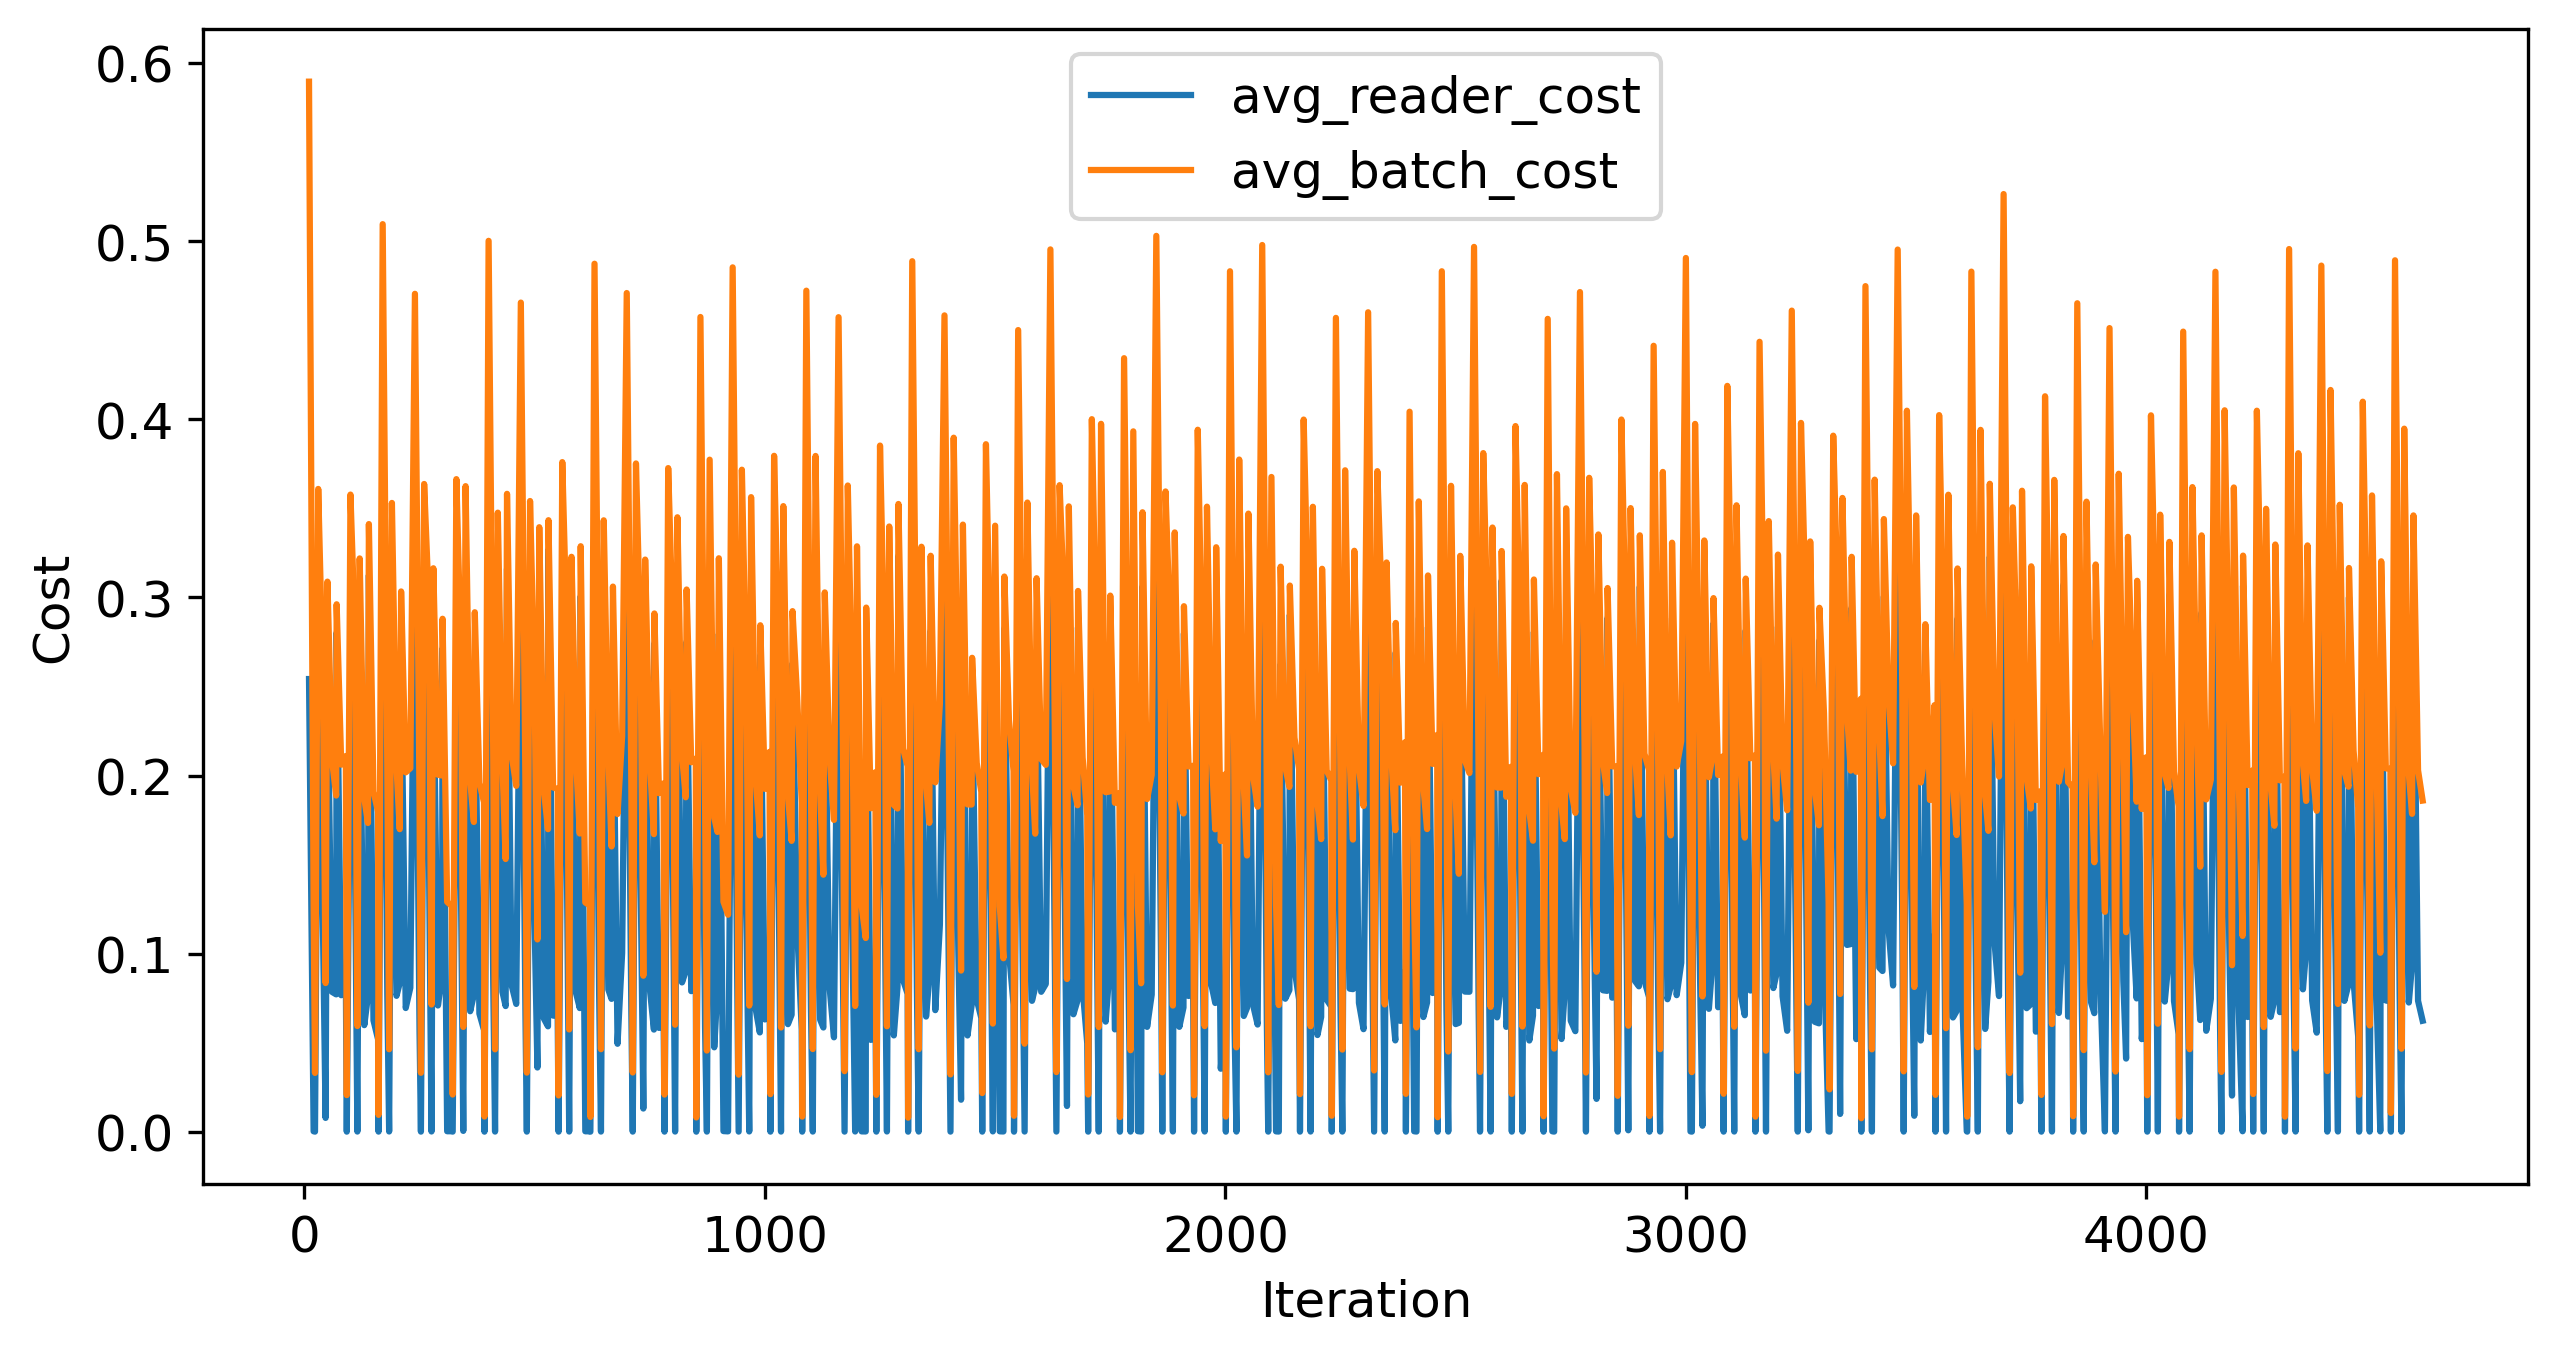

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(df["global_step"], df["avg_reader_cost"], label="avg_reader_cost")
plt.plot(df["global_step"], df["avg_batch_cost"], label="avg_batch_cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

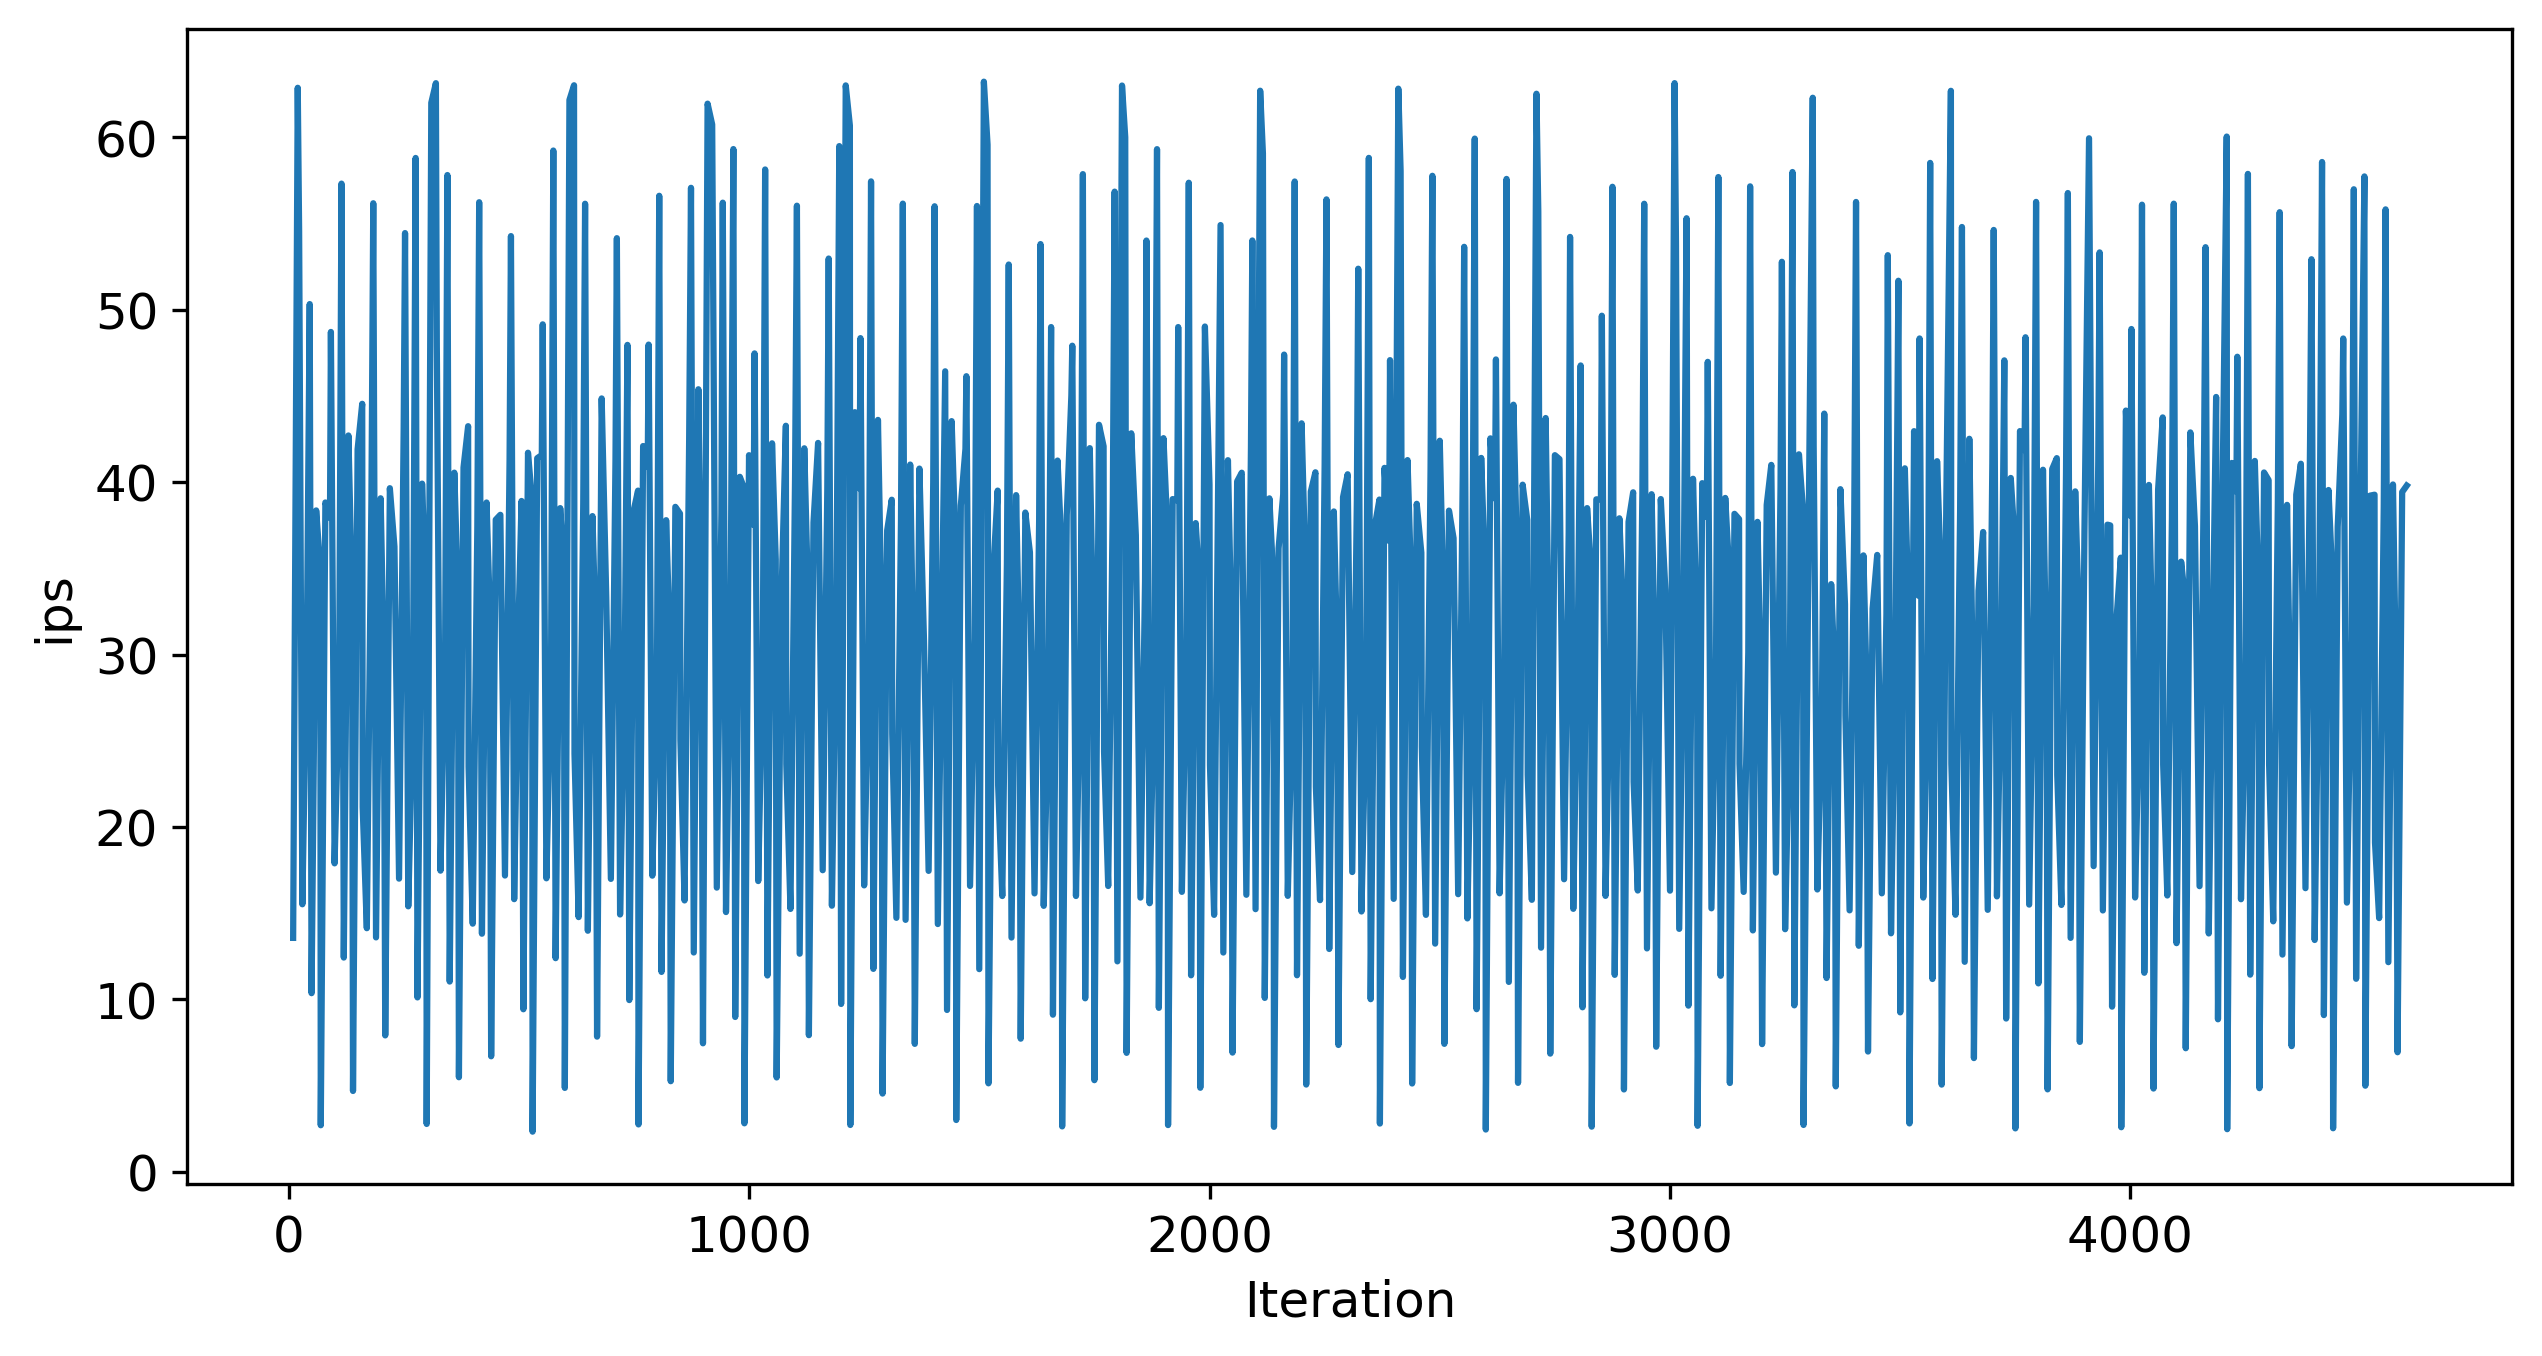

In [4]:
# plot ips
plt.figure(figsize=(10, 5))
plt.plot(df["global_step"], df["ips"], label="ips")
plt.xlabel("Iteration")
plt.ylabel("ips")
plt.show()


In [5]:
import re

# parse log
log_path = "output/union/exp/ser_vi_layoutxlm_xfund_zh/train.log"
with open(log_path, "r") as f:
    lines = f.readlines()

results = []
for line in lines:
    pattern = r"\[(?P<time>.*)\] ppocr INFO: cur metric, precision: (?P<precision>\d+\.\d+), recall: (?P<recall>\d+\.\d+), hmean: (?P<hmean>\d+\.\d+), fps: (?P<fps>\d+\.\d+)"
    match = re.match(pattern, line.strip())
    if match:
        results.append(match.groupdict())

import pandas as pd
import numpy as np

eval_step = 300

df = pd.DataFrame(results)
df['global_step'] = np.array(range(1, len(df) + 1)) * eval_step
df['time'] = df['time'].astype('datetime64')
df['precision'] = df['precision'].astype(float)
df['recall'] = df['recall'].astype(float)
df['hmean'] = df['hmean'].astype(float)
df['fps'] = df['fps'].astype(float)
df.head()

,time,precision,recall,hmean,fps,global_step
0,2022-12-08 02:31:17,0.882499,0.940891,0.910760,96.274120,300
1,2022-12-08 02:33:36,0.909957,0.927217,0.918506,98.106051,600
2,2022-12-08 02:35:55,0.900703,0.904279,0.902487,95.731272,900
3,2022-12-08 02:37:48,0.878801,0.905161,0.891786,97.647928,1200
4,2022-12-08 02:39:42,0.869295,0.924129,0.895873,97.083179,1500


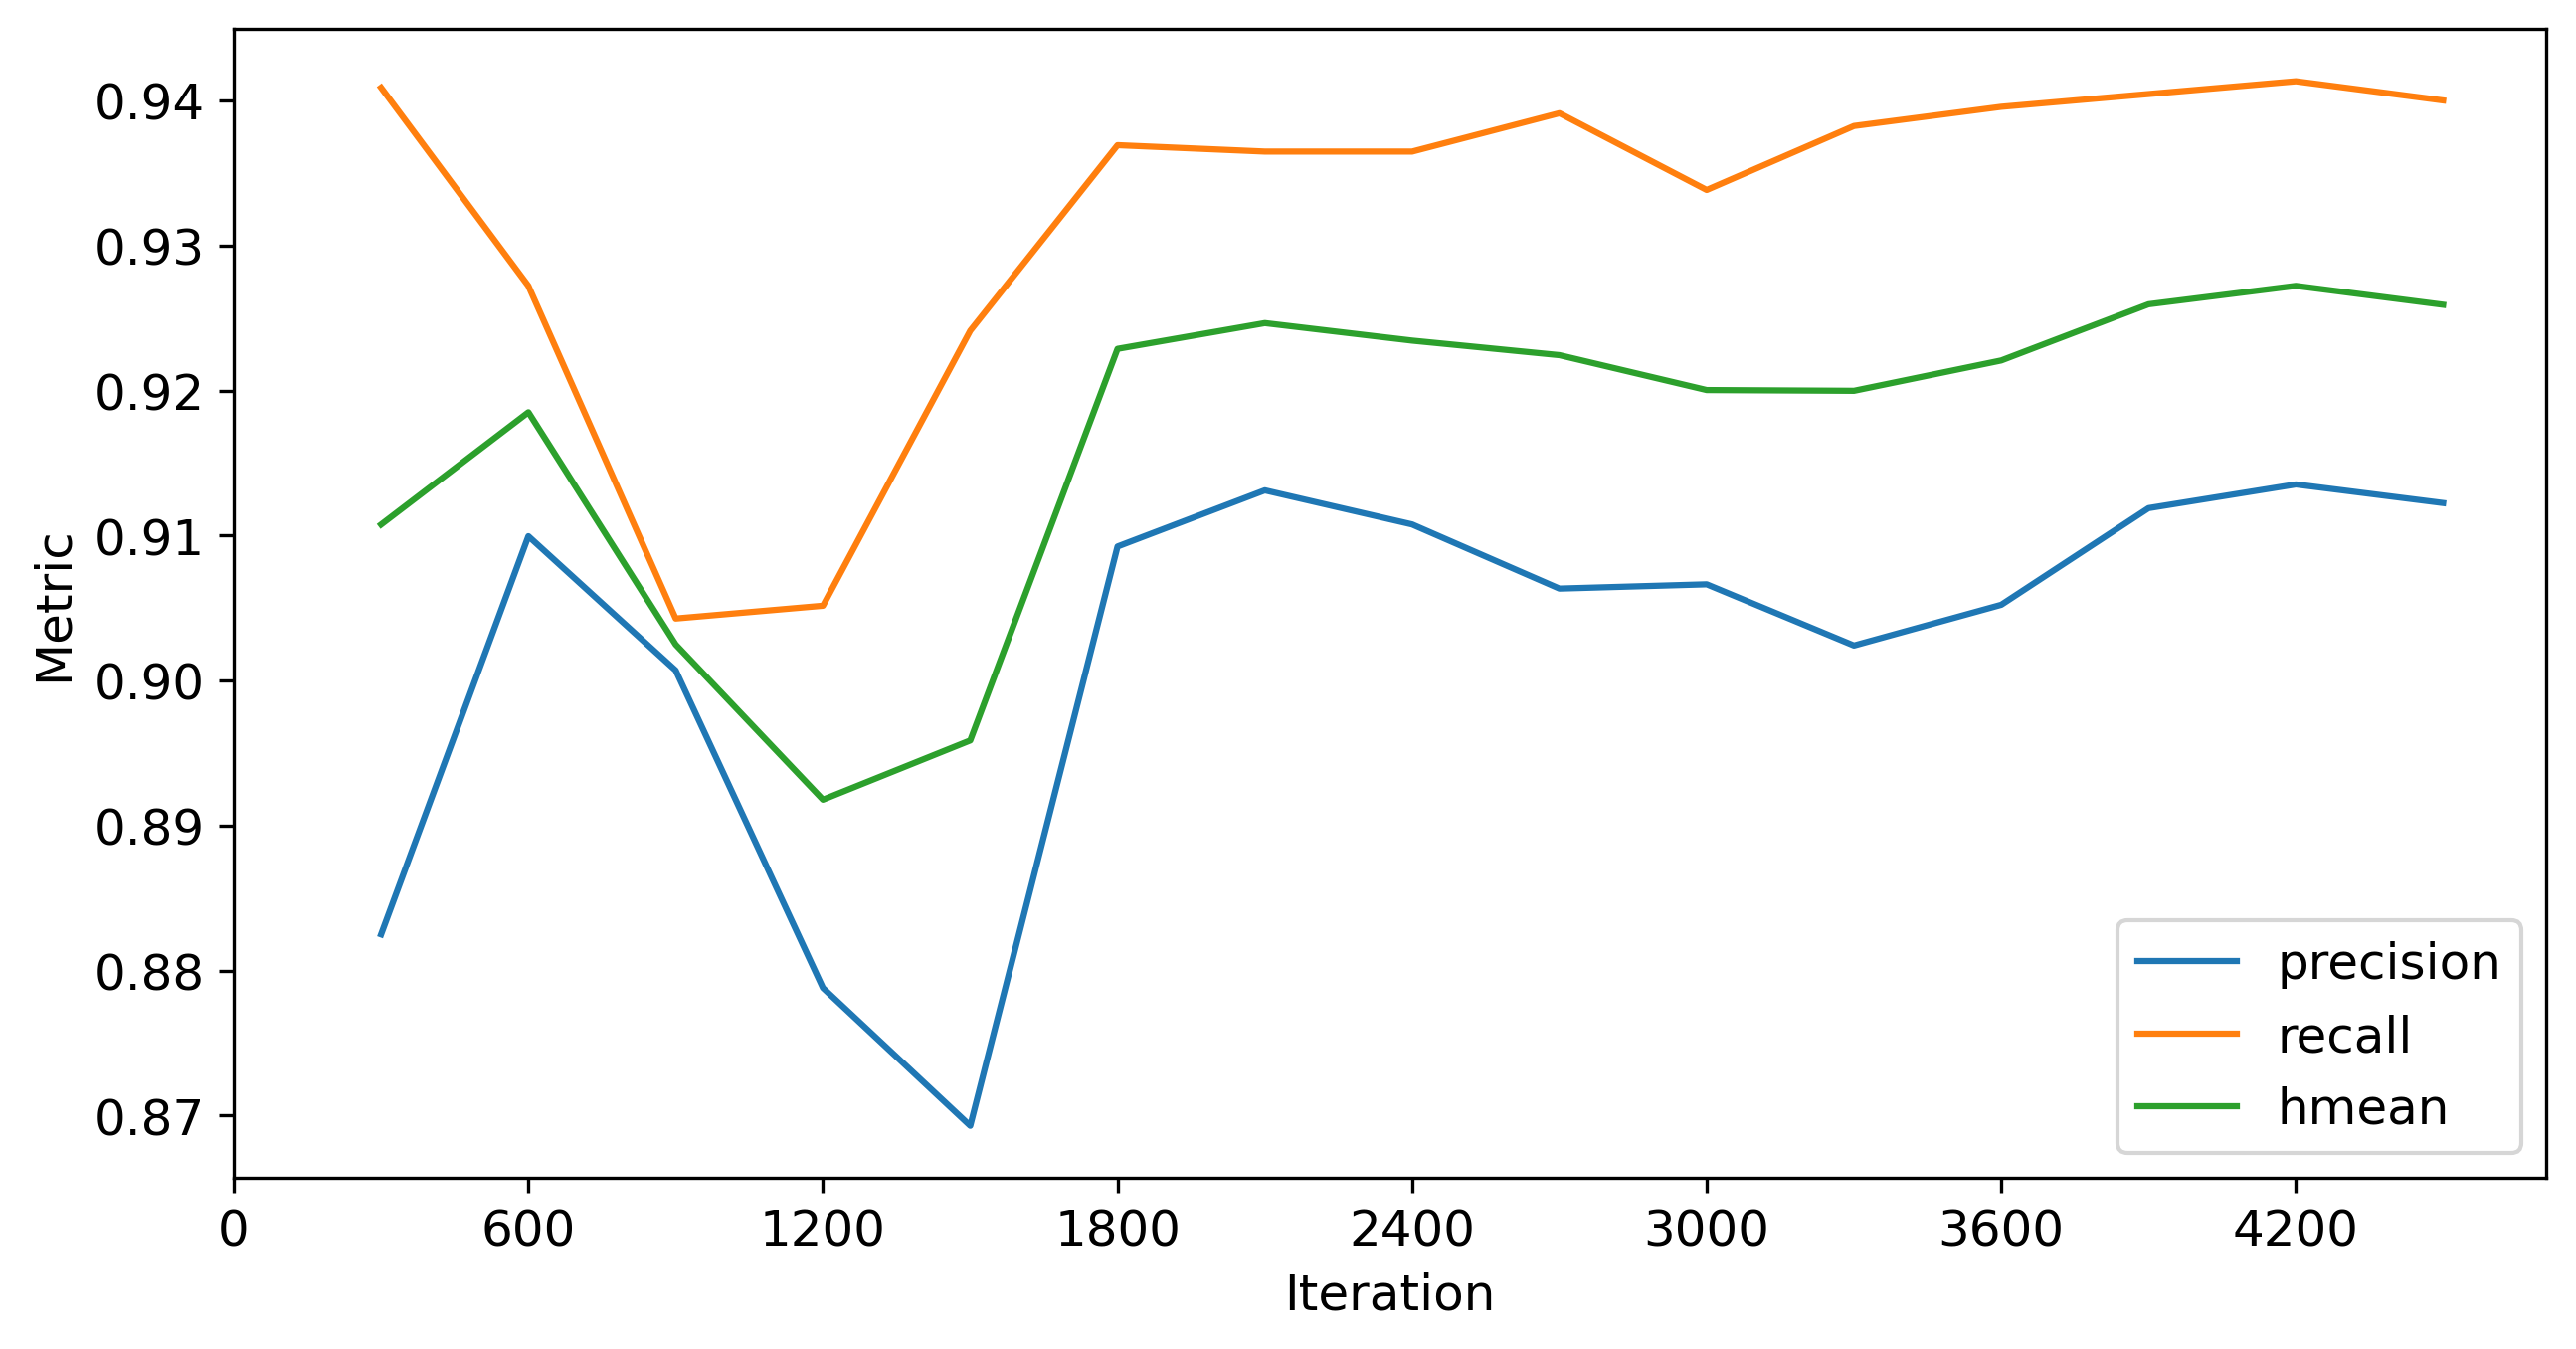

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df["global_step"], df["precision"], label="precision")
plt.plot(df["global_step"], df["recall"], label="recall")
plt.plot(df["global_step"], df["hmean"], label="hmean")

plt.xticks(np.arange(0, max(df["global_step"]), eval_step * 2))
plt.xlabel("Iteration")
plt.ylabel("Metric")
plt.legend()
# plt.show()
plt.savefig(os.path.join(save_figure_dir, "metric_train.png"), dpi=300)


## RE

In [7]:
import re

# parse log
save_dir = "output/union/exp/re_vi_layoutxlm_xfund_zh/"
log_path = os.path.join(save_dir, "train.log")
save_figure_dir = os.path.join(save_dir, "figrue")
if not os.path.exists(save_figure_dir):
    os.makedirs(save_figure_dir)
with open(log_path, "r") as f:
    lines = f.readlines()
results = []
for line in lines:
    pattern = r"\[(?P<time>.*)\] ppocr INFO: epoch: \[(?P<epoch>\d+)/(?P<epoch_total>\d+)\], global_step: (?P<global_step>\d+), lr: (?P<lr>\d+\.\d+), loss: (?P<loss>\d+\.\d+), avg_reader_cost: (?P<avg_reader_cost>\d+\.\d+) s, avg_batch_cost: (?P<avg_batch_cost>\d+\.\d+) s, avg_samples: (?P<avg_samples>\d+\.\d+), ips: (?P<ips>\d+\.\d+) samples/s, eta: (?P<eta>.*)"
    match = re.match(pattern, line.strip())
    if match:
        results.append(match.groupdict())

import pandas as pd

df = pd.DataFrame(results)
df["time"] = df["time"].astype("datetime64")
df["epoch"] = df["epoch"].astype(int)
df["epoch_total"] = df["epoch_total"].astype(int)
df["global_step"] = df["global_step"].astype(int)
df["lr"] = df["lr"].astype(float)
df["loss"] = df["loss"].astype(float)
df["avg_reader_cost"] = df["avg_reader_cost"].astype(float)
df["avg_batch_cost"] = df["avg_batch_cost"].astype(float)
df["avg_samples"] = df["avg_samples"].astype(float)
df["ips"] = df["ips"].astype(float)
df.head()

,time,epoch,epoch_total,global_step,lr,loss,avg_reader_cost,avg_batch_cost,avg_samples,ips,eta
0,2022-12-08 05:11:02,1,130,10,0.000000,1.832891,0.08930,7.22769,2.0,0.27671,23:12:32
1,2022-12-08 05:11:40,1,130,20,0.000001,1.441233,0.00016,3.77485,2.0,0.52982,17:38:59
2,2022-12-08 05:11:54,1,130,30,0.000001,0.960450,0.00016,1.41289,2.0,1.41554,13:15:58
3,2022-12-08 05:12:00,1,130,40,0.000002,0.590612,0.00017,0.57162,2.0,3.49883,10:23:55
4,2022-12-08 05:12:06,1,130,50,0.000003,0.439448,0.00019,0.60755,2.0,3.29189,8:42:01


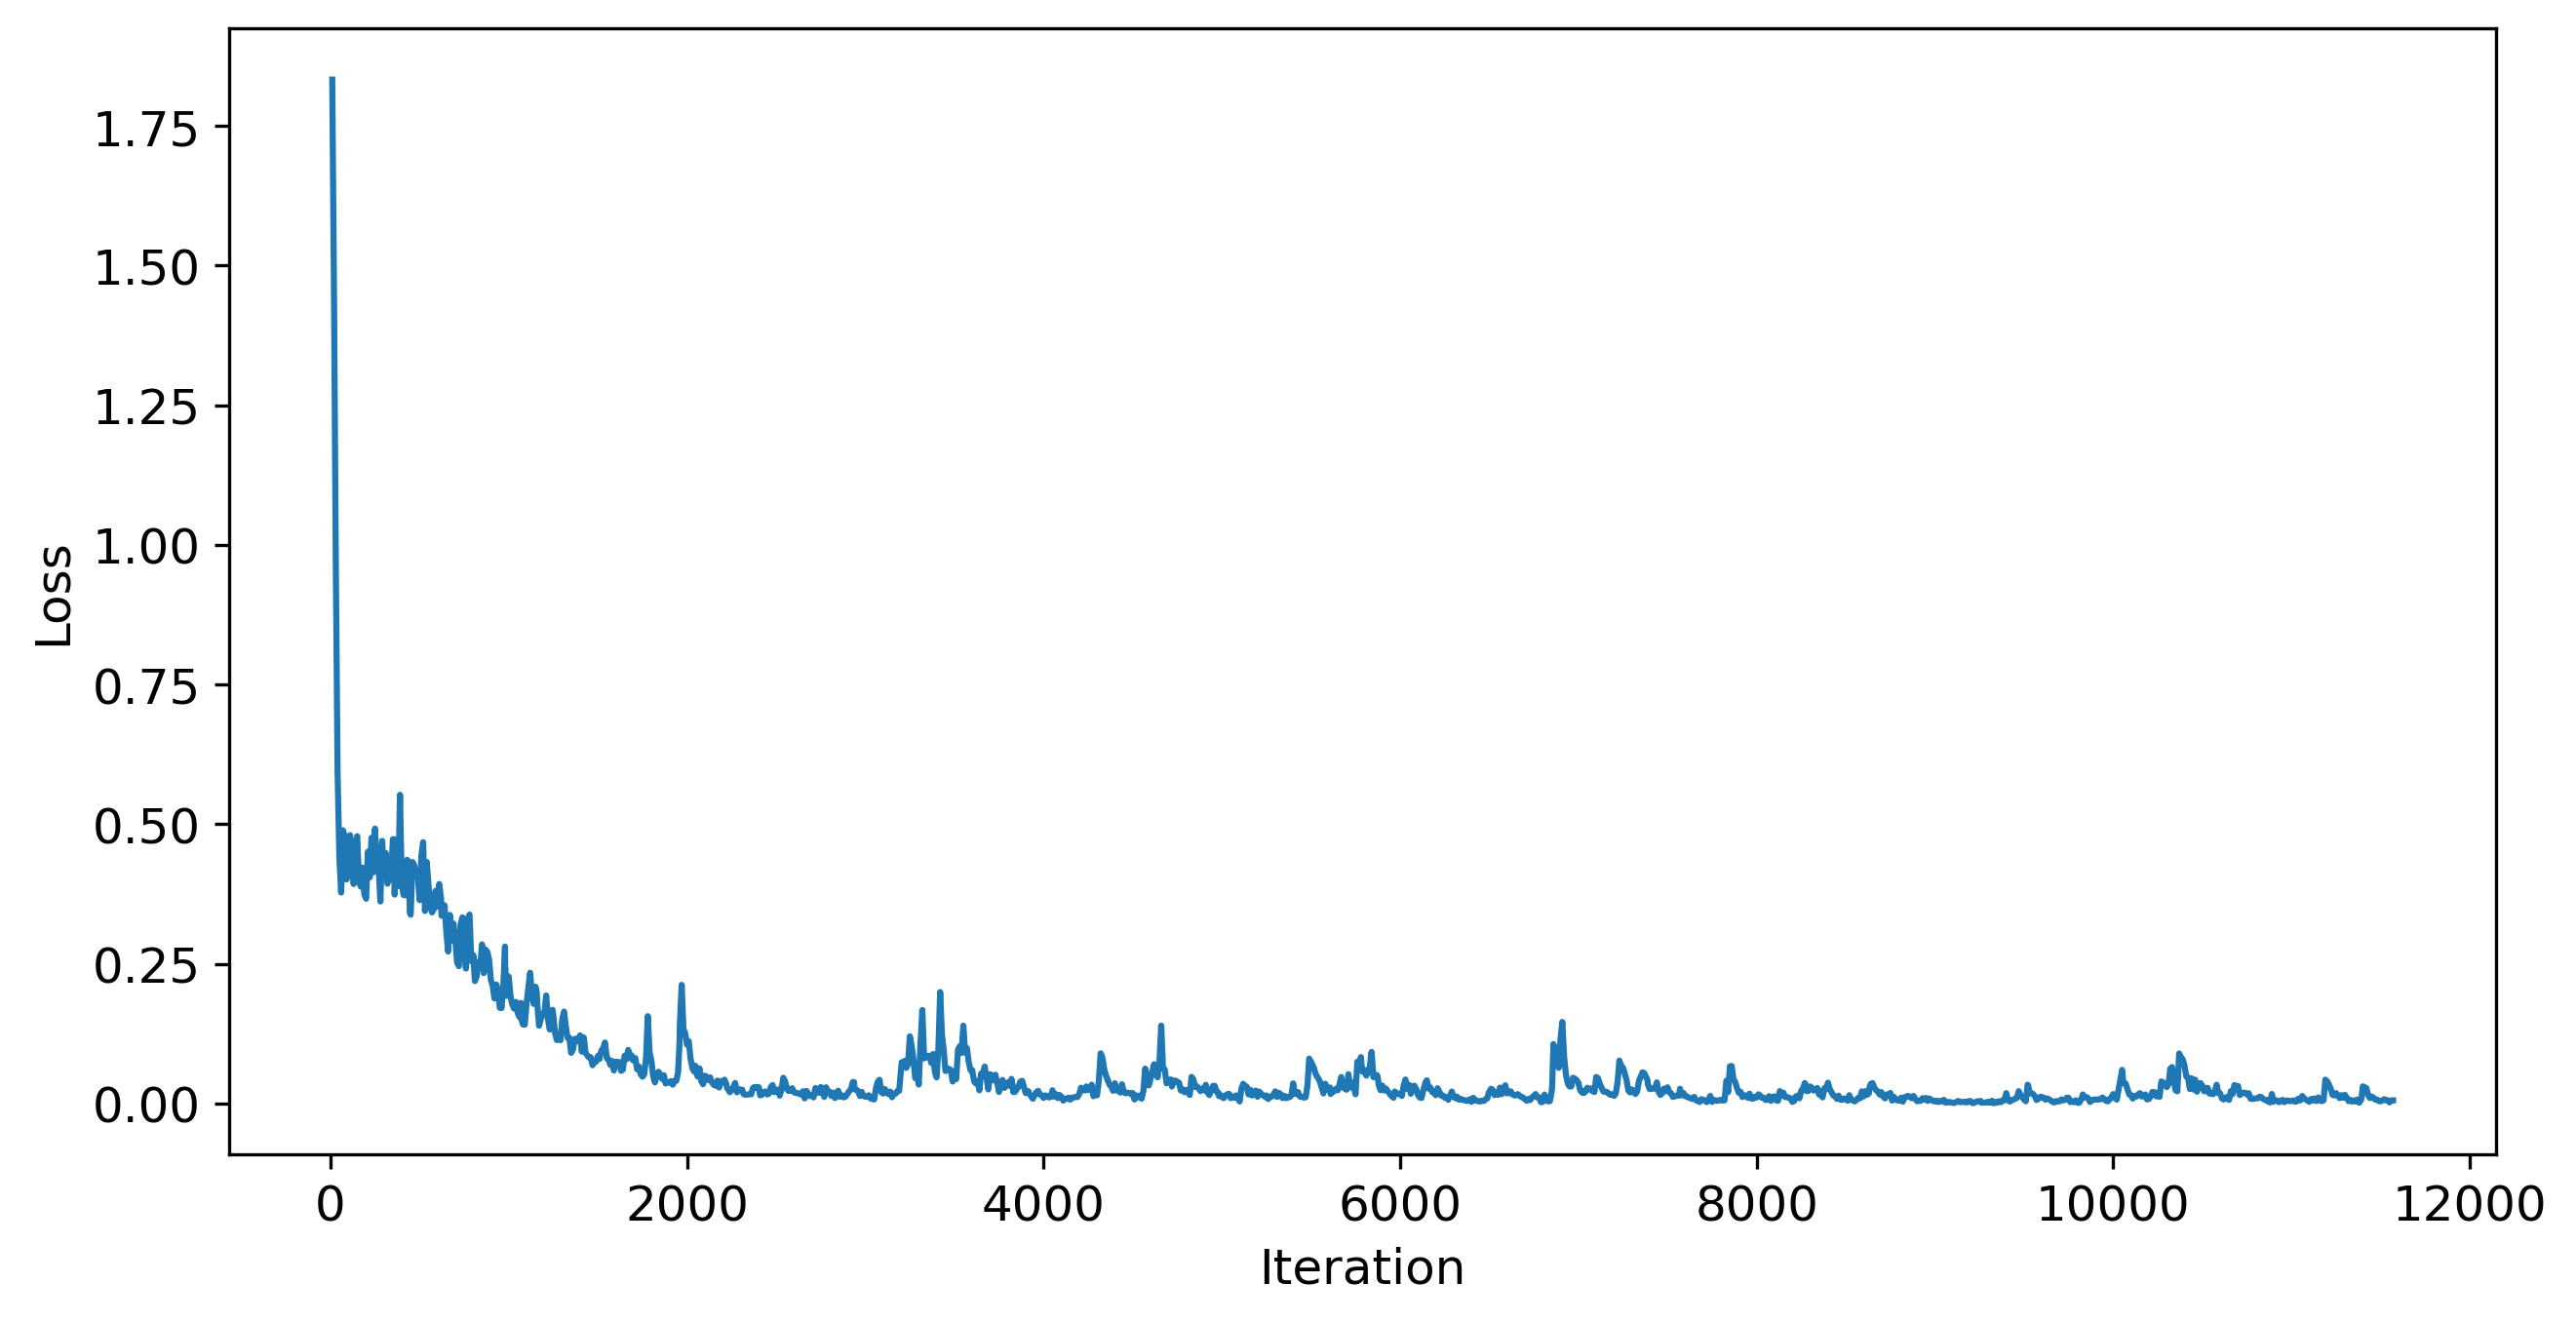

In [8]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300

plt.figure(figsize=(10, 5))
plt.plot(df["global_step"], df["loss"], label="loss")
# plt.title("Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
# plt.show()
plt.savefig(os.path.join(save_figure_dir, "loss_val.png"), dpi=300)


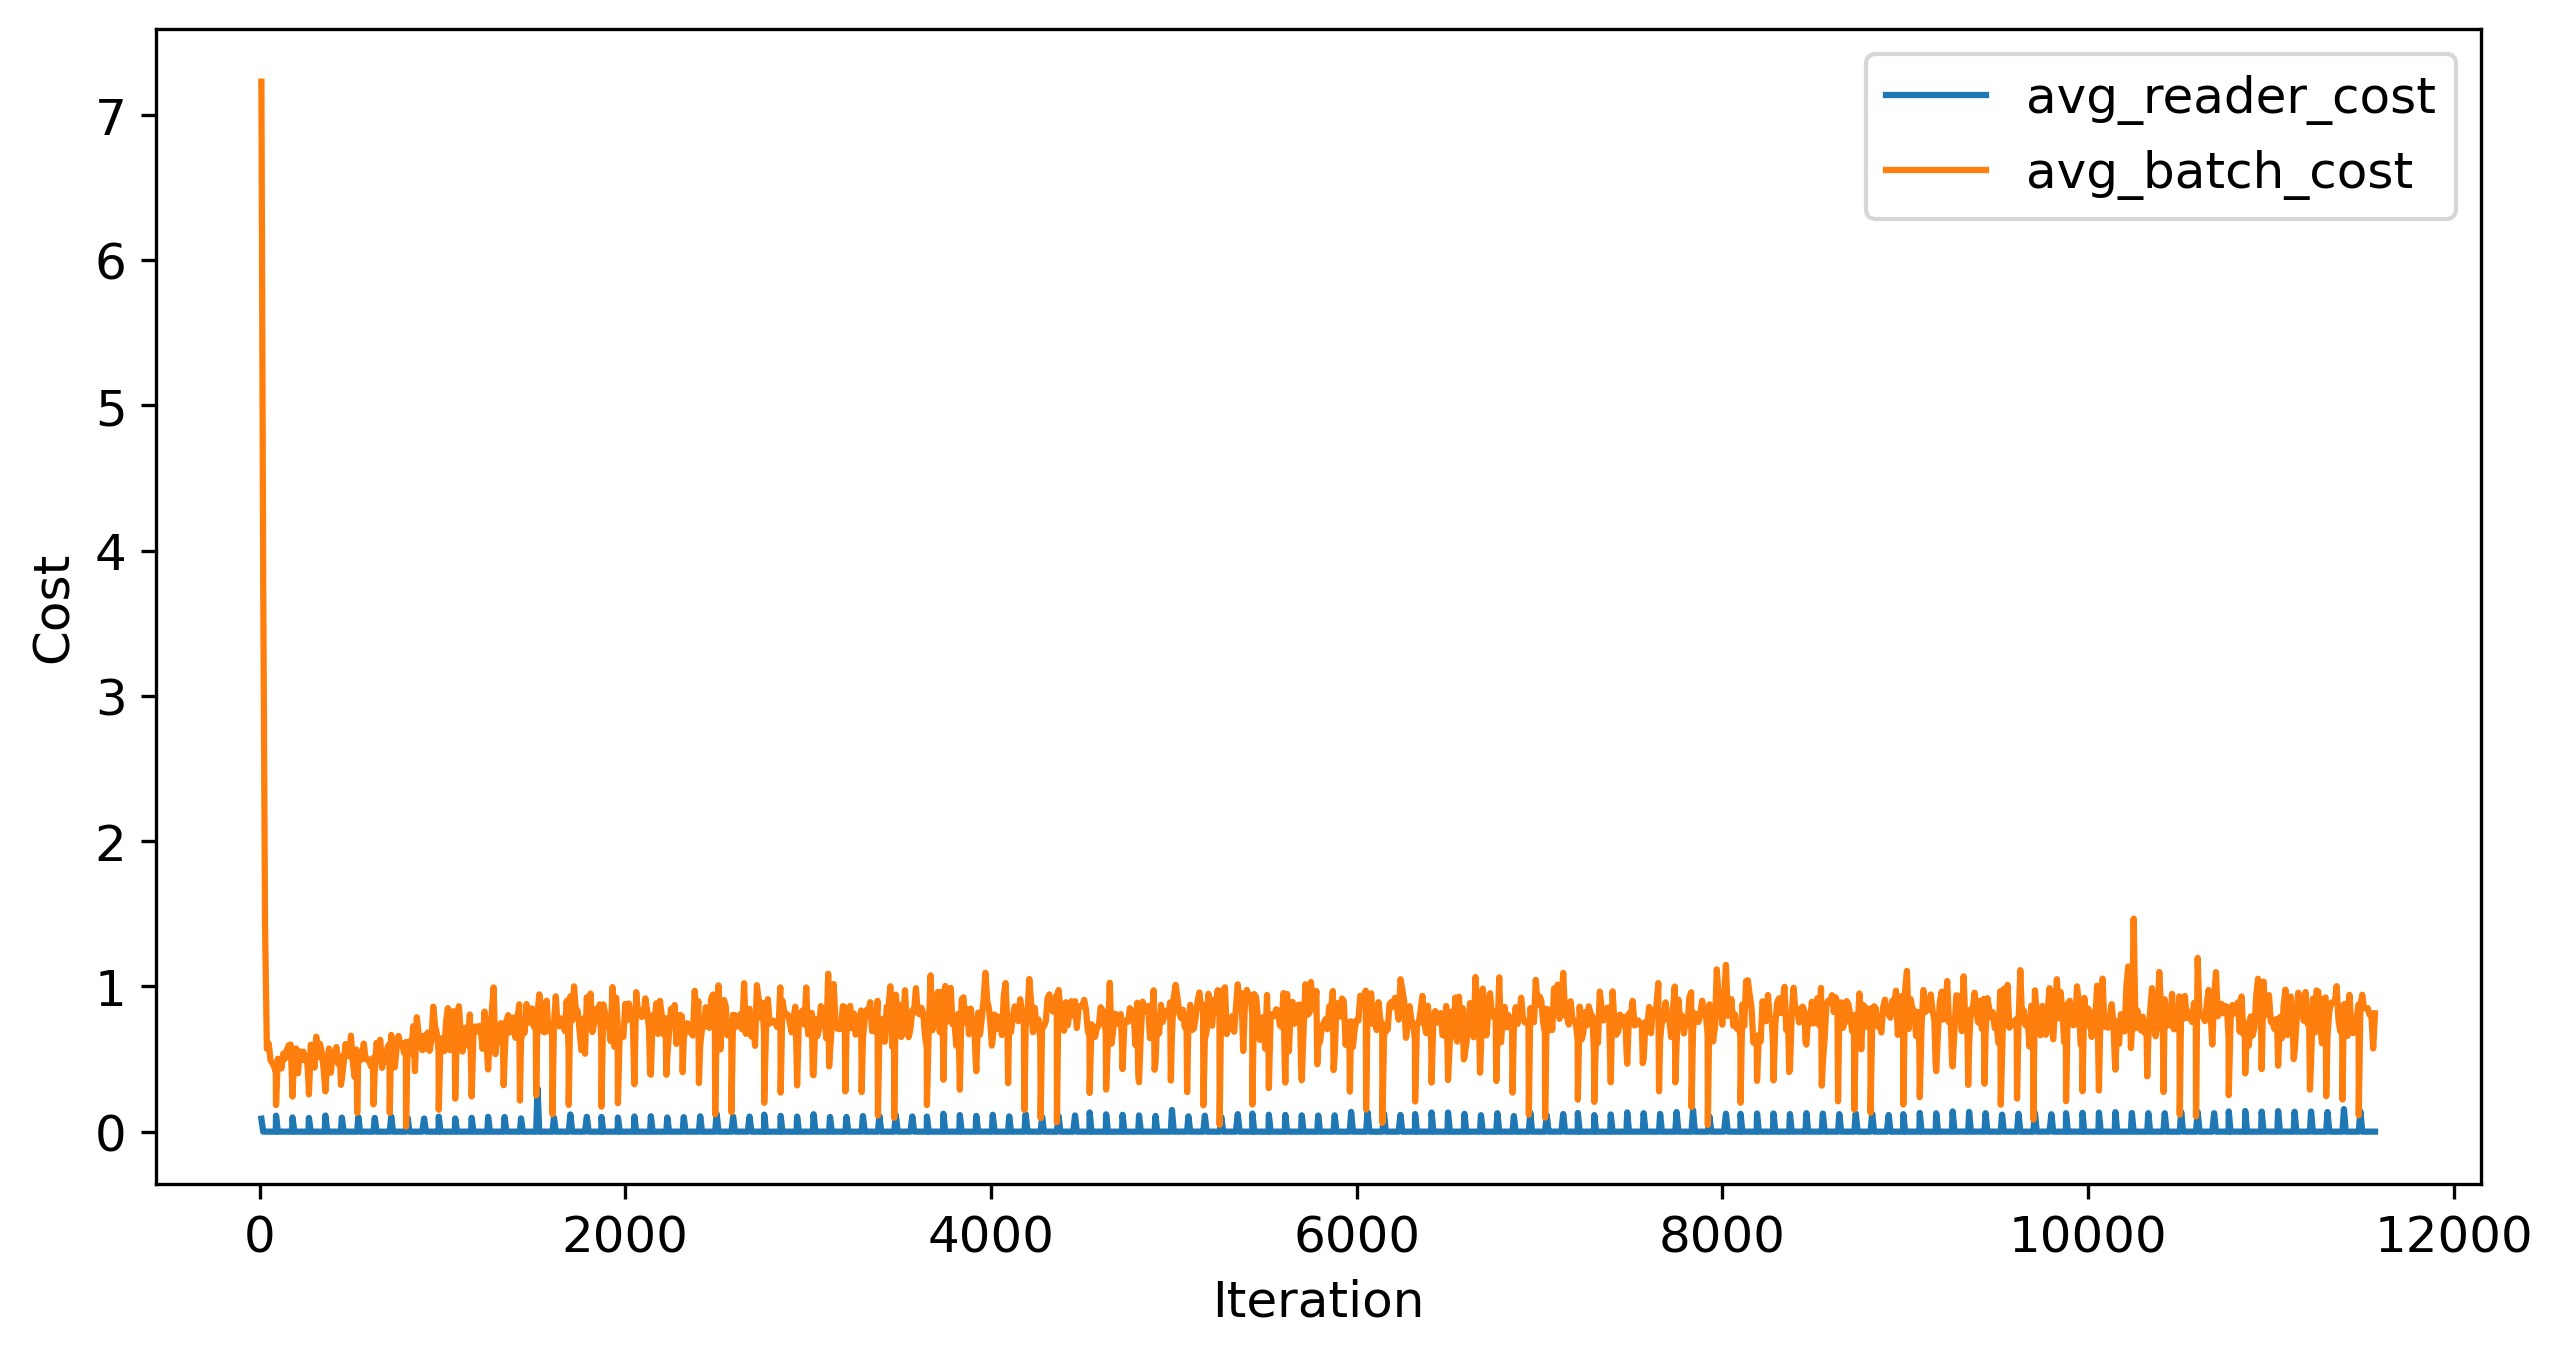

<Figure size 1920x1440 with 0 Axes>

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(df["global_step"], df["avg_reader_cost"], label="avg_reader_cost")
plt.plot(df["global_step"], df["avg_batch_cost"], label="avg_batch_cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
plt.savefig(os.path.join(save_figure_dir, "metric_val.png"), dpi=300)

Text(0, 0.5, 'ips')

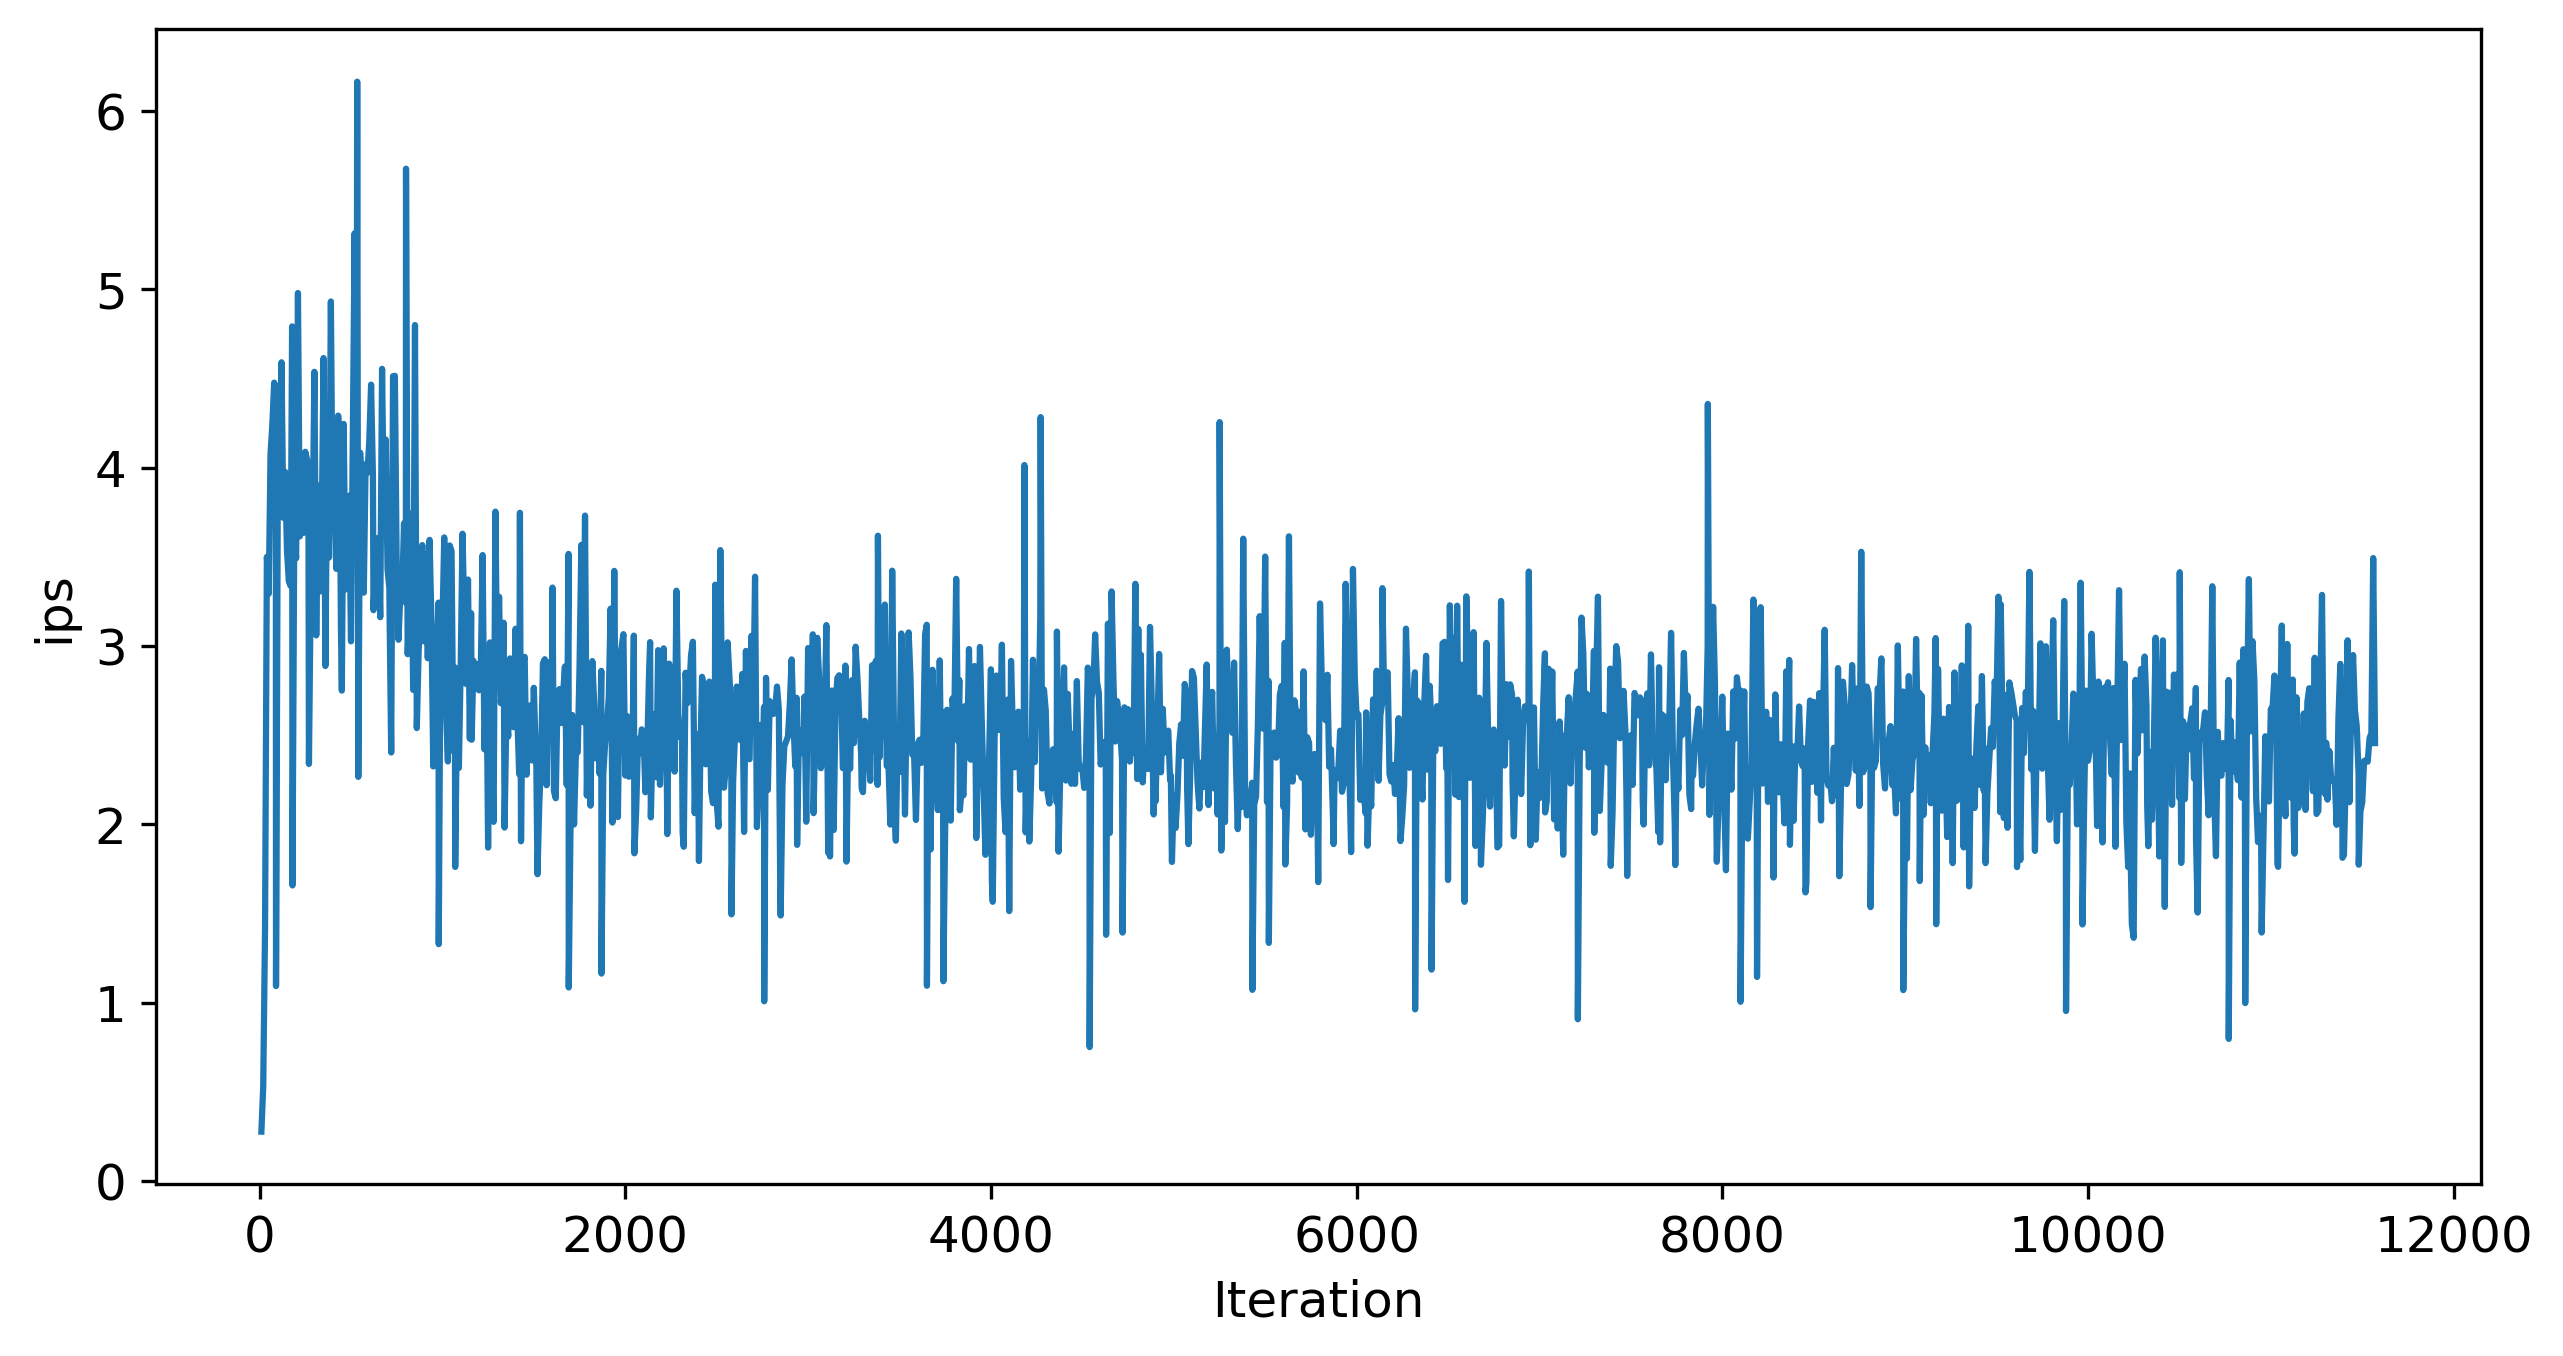

In [10]:
# plot ips
plt.figure(figsize=(10, 5))
plt.plot(df["global_step"], df["ips"], label="ips")
plt.xlabel("Iteration")
plt.ylabel("ips")
# plt.show()


In [11]:
import re

# parse log
log_path = "output/union/exp/re_vi_layoutxlm_xfund_zh/train.log"
with open(log_path, "r") as f:
    lines = f.readlines()

results = []
for line in lines:
    pattern = r"\[(?P<time>.*)\] ppocr INFO: cur metric, precision: (?P<precision>\d+\.\d+), recall: (?P<recall>\d+\.\d+), hmean: (?P<hmean>\d+\.\d+), fps: (?P<fps>\d+\.\d+)"
    match = re.match(pattern, line.strip())
    if match:
        results.append(match.groupdict())

import pandas as pd
import numpy as np

eval_step = 300

df = pd.DataFrame(results)
df['global_step'] = np.array(range(1, len(df) + 1)) * eval_step
df['time'] = df['time'].astype('datetime64')
df['precision'] = df['precision'].astype(float)
df['recall'] = df['recall'].astype(float)
df['hmean'] = df['hmean'].astype(float)
df['fps'] = df['fps'].astype(float)
df.head()

,time,precision,recall,hmean,fps,global_step
0,2022-12-08 05:22:14,0.502864,0.362510,0.421305,3.735585,300
1,2022-12-08 05:26:47,0.503708,0.672998,0.576175,2.958643,600
2,2022-12-08 05:31:43,0.640297,0.855491,0.732414,2.945905,900
3,2022-12-08 05:36:50,0.591494,0.872832,0.705137,2.777111,1200
4,2022-12-08 05:41:18,0.625290,0.890173,0.734583,2.751820,1500


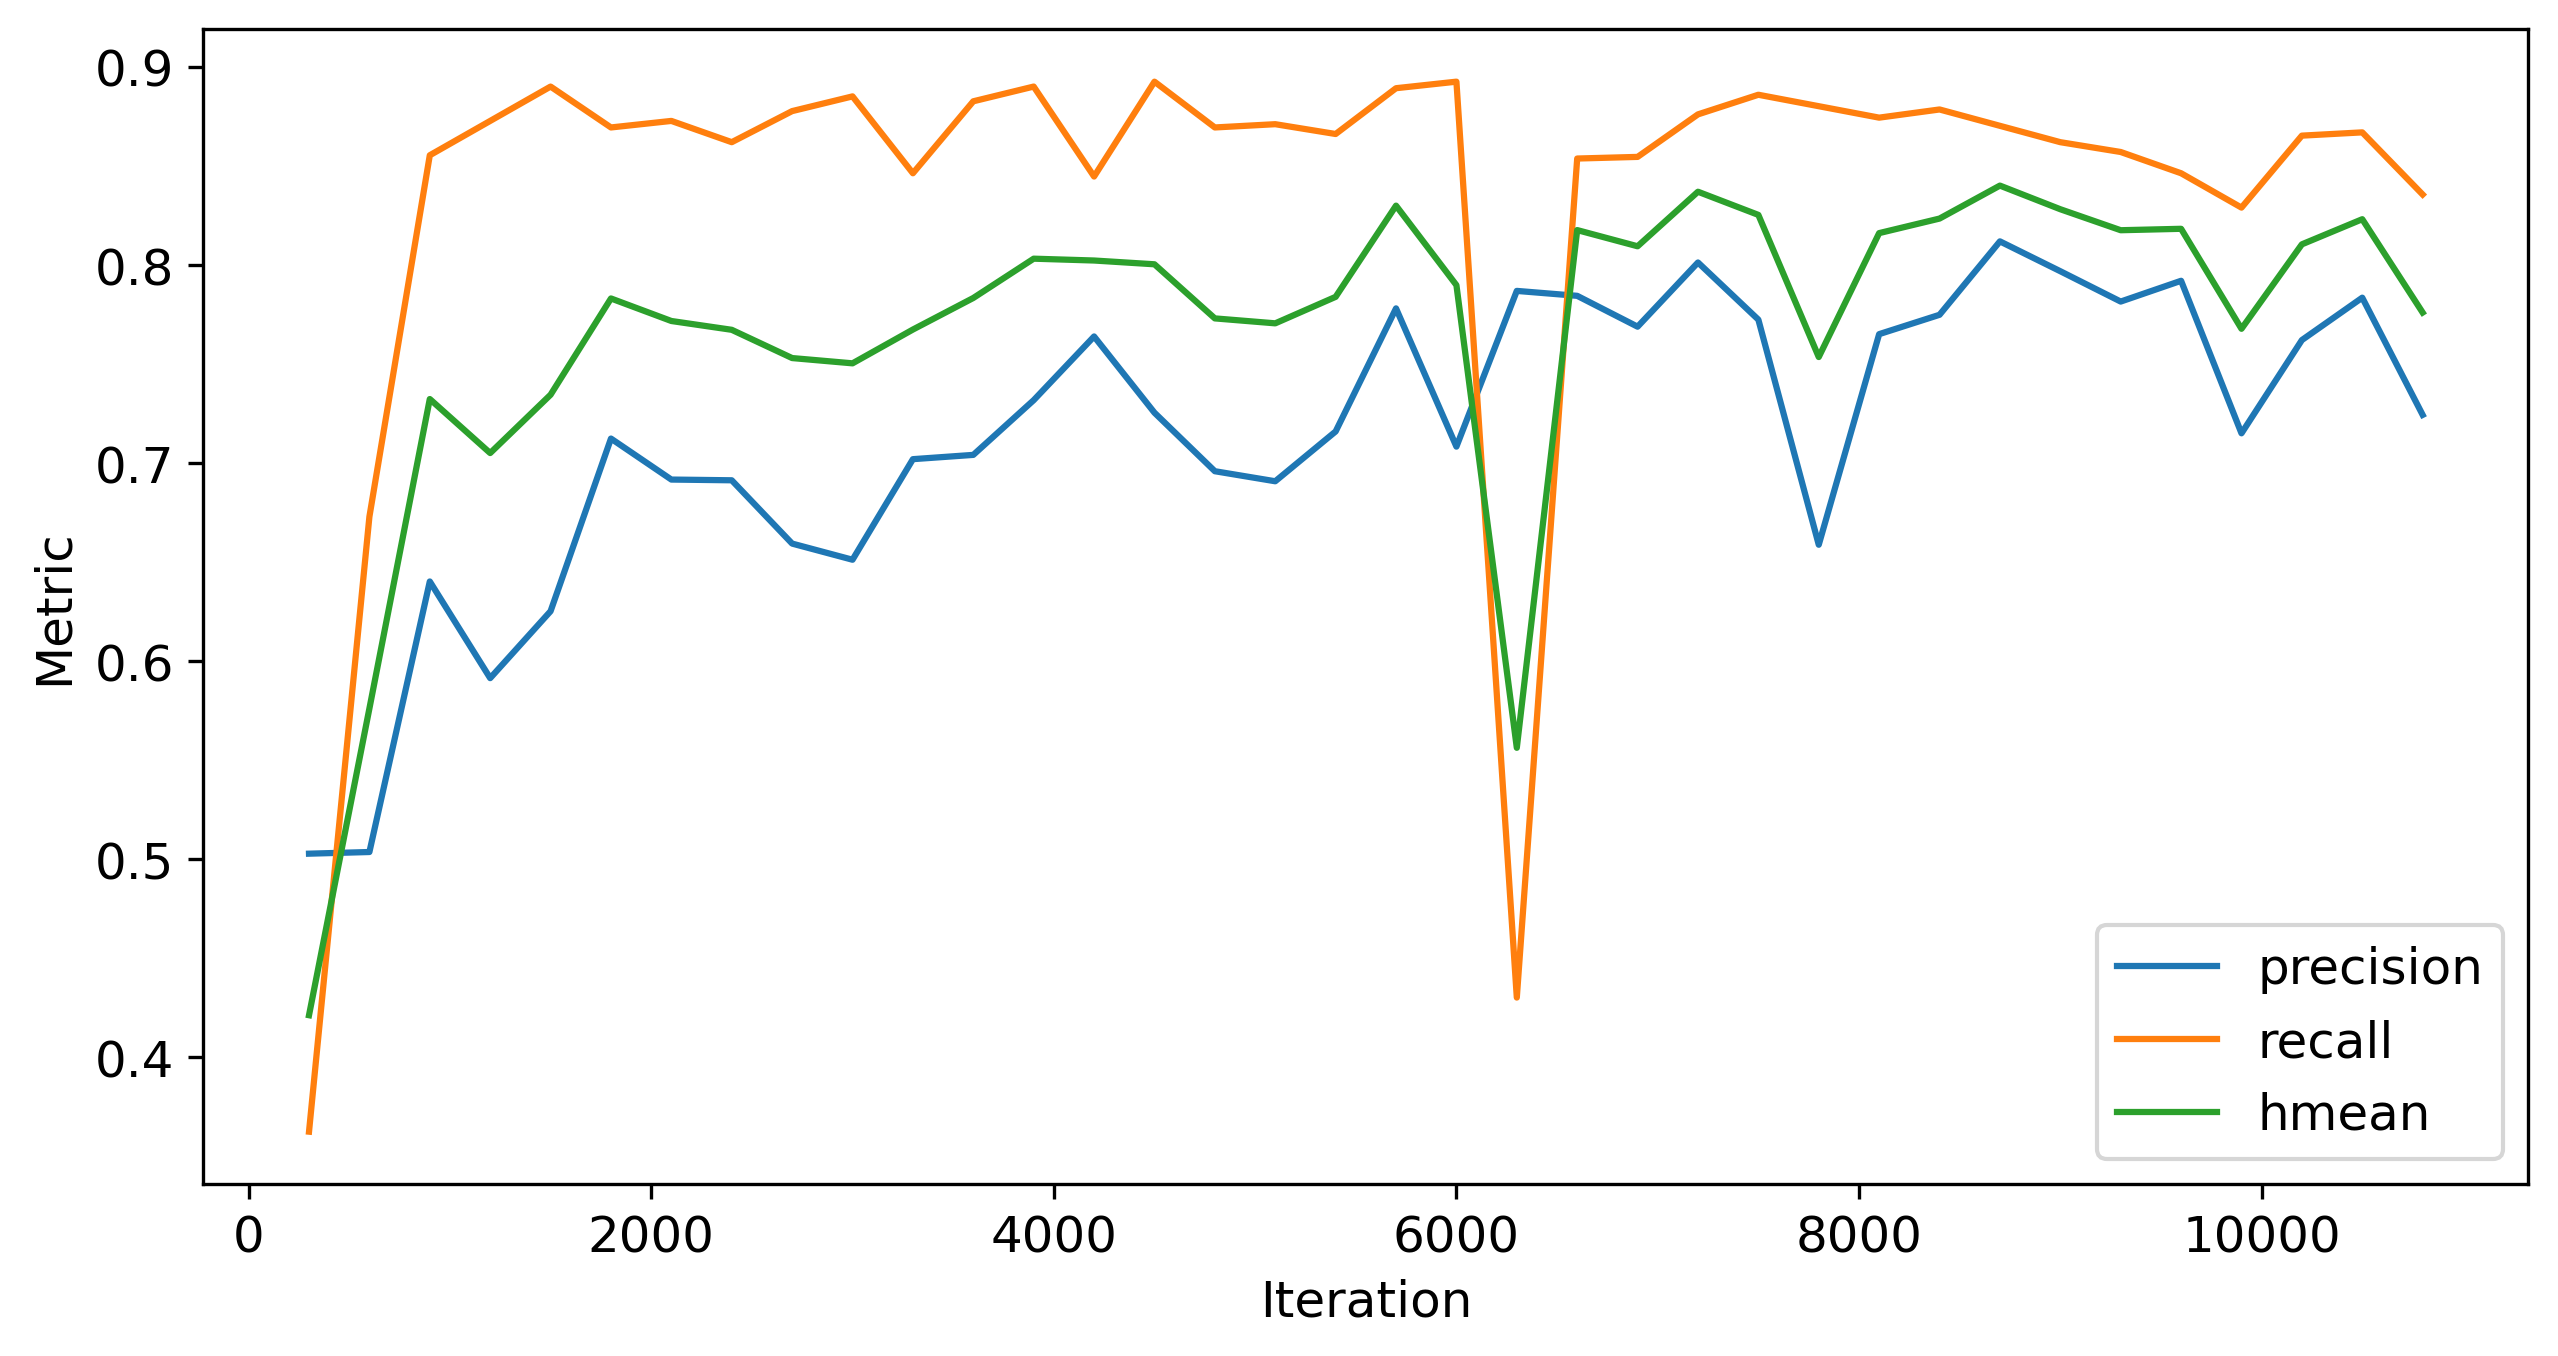

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df["global_step"], df["precision"], label="precision")
plt.plot(df["global_step"], df["recall"], label="recall")
plt.plot(df["global_step"], df["hmean"], label="hmean")

# plt.xticks(np.arange(0, max(df["global_step"]), eval_step * 2))
plt.xlabel("Iteration")
plt.ylabel("Metric")
plt.legend()
# plt.show()
plt.savefig(os.path.join(save_figure_dir, "metric_val.png"), dpi=300)
